## Imports

In [12]:
import csv, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

## Functions

In [13]:
def get_csv_dict(file_path):
    ret_dict = dict()
    with open(file_path, encoding='utf-8') as csvf:
        count = 0
        for line in csv.DictReader(csvf):
            count += 1
            ret_dict[line["appId"]] = line
        return ret_dict
    
def split_data_into_genres(data):
    genre_dict = dict()
    
    for key, val in data.items():
        if val["category"] not in genre_dict:
            genre_dict[val["category"]] = dict()
        genre_dict[val["category"]][key] = val
        
    return genre_dict

## Analysis

In [14]:
path = "../Data/data.csv"
data = get_csv_dict(path)
genre_dict = split_data_into_genres(data)
print(len(genre_dict))
total = 0
for key, val in genre_dict.items():
    print("\t", len(val))
    total += len(val)
    
print("Total: ", total)
print(len(data))

59
	 361
	 171
	 245
	 204
	 138
	 308
	 278
	 170
	 272
	 204
	 297
	 307
	 101
	 268
	 269
	 306
	 188
	 137
	 319
	 239
	 311
	 307
	 242
	 167
	 296
	 310
	 309
	 247
	 220
	 315
	 299
	 281
	 280
	 207
	 368
	 311
	 250
	 337
	 222
	 211
	 121
	 250
	 247
	 151
	 229
	 174
	 235
	 227
	 180
	 218
	 143
	 157
	 4
	 111
	 119
	 92
	 53
	 88
	 44
Total:  13115
13115


In [15]:
path = "../Data/data.csv"
df = pd.read_csv(path)
df = df.dropna(subset=['permissions', 'installs'])
df

,title,appId,url,developer,devID,price,free,category,permissions,installs
0,TikTok - Trends Start Here,com.zhiliaoapp.musically,https://play.google.com/store/apps/details?id=...,TikTok Pte. Ltd.,TikTok+Pte.+Ltd.,0.00,True,APPLICATION,{'Device & app history': ['retrieve running ap...,"1,000,000,000+"
1,ZOOM Cloud Meetings,us.zoom.videomeetings,https://play.google.com/store/apps/details?id=...,zoom.us,zoom.us,0.00,True,APPLICATION,{'Device ID & call information': ['read phone ...,"100,000,000+"
2,WhatsApp Messenger,com.whatsapp,https://play.google.com/store/apps/details?id=...,WhatsApp Inc.,WhatsApp+Inc.,0.00,True,APPLICATION,"{'Contacts': ['modify your contacts', 'find ac...","5,000,000,000+"
3,Cash App,com.squareup.cash,https://play.google.com/store/apps/details?id=...,"Square, Inc.",4878871734928263649,0.00,True,APPLICATION,"{'Identity': ['find accounts on the device', '...","10,000,000+"
4,"Discord - Talk, Video Chat & Hang Out with Fri...",com.discord,https://play.google.com/store/apps/details?id=...,Discord Inc.,Discord+Inc.,0.00,True,APPLICATION,"{'Identity': ['find accounts on the device'], ...","100,000,000+"
...,...,...,...,...,...,...,...,...,...,...
13163,Kids Trains Pro,com.ogien.kidstrainspro,https://play.google.com/store/apps/details?id=...,3583 Bytes,7830845280092528776,1.49,False,FAMILY_PRETEND,{'Other': ['full network access']},500+
13164,Sago Mini Town,com.sagosago.Town.googleplay,https://play.google.com/store/apps/details?id=...,Sago Mini,6600704821286067966,3.99,False,FAMILY_PRETEND,{'Photos/Media/Files': ['read the contents of ...,"10,000+"
13165,Sago Mini Super Juice,com.sagosago.Juice.googleplay,https://play.google.com/store/apps/details?id=...,Sago Mini,6600704821286067966,3.99,False,FAMILY_PRETEND,{'Wi-Fi connection information': ['view Wi-Fi ...,"5,000+"
13166,My Town : ICEME Amusement Park,mytown.amusementpark,https://play.google.com/store/apps/details?id=...,My Town Games Ltd,4907572025980617983,2.99,False,FAMILY_PRETEND,{'Photos/Media/Files': ['read the contents of ...,"10,000+"


In [16]:
df['category'].unique()

array(['APPLICATION', 'ANDROID_WEAR', 'ART_AND_DESIGN',
       'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS',
       'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
       'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'MUSIC_AND_AUDIO',
       'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION',
       'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS',
       'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER', 'GAME',
       'GAME_ACTION', 'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_BOARD',
       'GAME_CARD', 'GAME_CASINO', 'GAME_CASUAL', 'GAME_EDUCATIONAL',
       'GAME_MUSIC', 'GAME_PUZZLE', 'GAME_RACING', 'GAME_ROLE_PLAYING',
       'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY', 'GAME_TRIVIA',
       'GAME_WORD', 'FAMILY', 'FAMILY_ACTION', 'FAMILY_BRAINGAMES',
       'FAMILY_CREATE', 'FAMILY_EDUCATION', 'FAMILY_MU

In [17]:
df2 = df.groupby('category')['appId'].count()
print(len(df2.index))
remove = ['GAME_ACTION', 'GAME_ADVENTURE',\
       'GAME_ARCADE', 'GAME_BOARD', 'GAME_CARD', 'GAME_CASINO', 'GAME_CASUAL', \
       'GAME_EDUCATIONAL', 'GAME_MUSIC', 'GAME_PUZZLE', 'GAME_RACING', \
       'GAME_ROLE_PLAYING', 'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY', \
       'GAME_TRIVIA', 'GAME_WORD', 'FAMILY_ACTION', 'FAMILY_BRAINGAMES', 'FAMILY_CREATE', \
       'FAMILY_EDUCATION', 'FAMILY_MUSICVIDEO', 'FAMILY_PRETEND']
df = df[~df['category'].isin(remove)]
df2 = df2.drop(labels=remove)
print(len(df2.index))

59
36


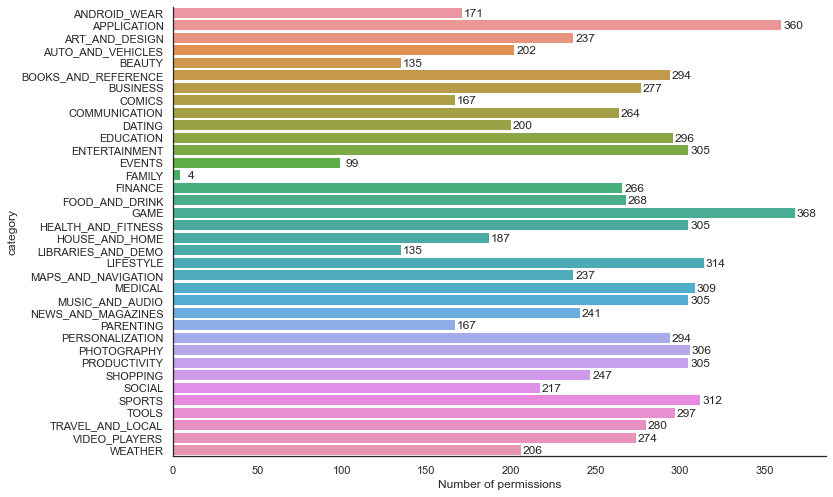

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
splot = sns.barplot(x=df2.values, y=df2.index, orient = 'h', linewidth=0)
splot.set(xlabel="Number of permissions")
sns.despine()
for p in splot.patches:
    width = p.get_width()
    plt.text(7+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
plt.savefig('permissions_per_cat.png', bbox_inches = "tight")

In [19]:
df = df.copy()
for idx, row in df.iterrows():
    d = ast.literal_eval(row['permissions'])
    num = 0
    for key, value in d.items():
        for item in value:
            num += 1
    #row['num_permissions'] = count
    df.loc[idx, "num_permissions"] = int(num)

In [20]:
df

,title,appId,url,developer,devID,price,free,category,permissions,installs,num_permissions
0,TikTok - Trends Start Here,com.zhiliaoapp.musically,https://play.google.com/store/apps/details?id=...,TikTok Pte. Ltd.,TikTok+Pte.+Ltd.,0.00,True,APPLICATION,{'Device & app history': ['retrieve running ap...,"1,000,000,000+",24.0
1,ZOOM Cloud Meetings,us.zoom.videomeetings,https://play.google.com/store/apps/details?id=...,zoom.us,zoom.us,0.00,True,APPLICATION,{'Device ID & call information': ['read phone ...,"100,000,000+",29.0
2,WhatsApp Messenger,com.whatsapp,https://play.google.com/store/apps/details?id=...,WhatsApp Inc.,WhatsApp+Inc.,0.00,True,APPLICATION,"{'Contacts': ['modify your contacts', 'find ac...","5,000,000,000+",40.0
3,Cash App,com.squareup.cash,https://play.google.com/store/apps/details?id=...,"Square, Inc.",4878871734928263649,0.00,True,APPLICATION,"{'Identity': ['find accounts on the device', '...","10,000,000+",23.0
4,"Discord - Talk, Video Chat & Hang Out with Fri...",com.discord,https://play.google.com/store/apps/details?id=...,Discord Inc.,Discord+Inc.,0.00,True,APPLICATION,"{'Identity': ['find accounts on the device'], ...","100,000,000+",17.0
...,...,...,...,...,...,...,...,...,...,...,...
8987,The Pocket Arcade,com.rogue.arcade,https://play.google.com/store/apps/details?id=...,"Rogue Games, Inc.",9104457198089339529,3.99,False,GAME,{'Photos/Media/Files': ['read the contents of ...,"5,000+",10.0
12653,Baby Twins - Newborn Care,com.tabtale.babytwins,https://play.google.com/store/apps/details?id=...,TabTale,5735447750101420287,0.00,True,FAMILY,{'Photos/Media/Files': ['read the contents of ...,"10,000,000+",8.0
12654,L.O.L. Surprise Ball Pop,com.mgae.comlolsurprise.ballpop,https://play.google.com/store/apps/details?id=...,MGA Entertainment,7977425518165110203,0.00,True,FAMILY,{'Photos/Media/Files': ['read the contents of ...,"10,000,000+",10.0
12655,Baking Cupcakes 7 - Cooking Games,air.cellygame.cupcakescookinglesson,https://play.google.com/store/apps/details?id=...,CellyGame,8709924520757064172,0.00,True,FAMILY,"{'Other': ['full network access', 'view networ...","10,000,000+",2.0


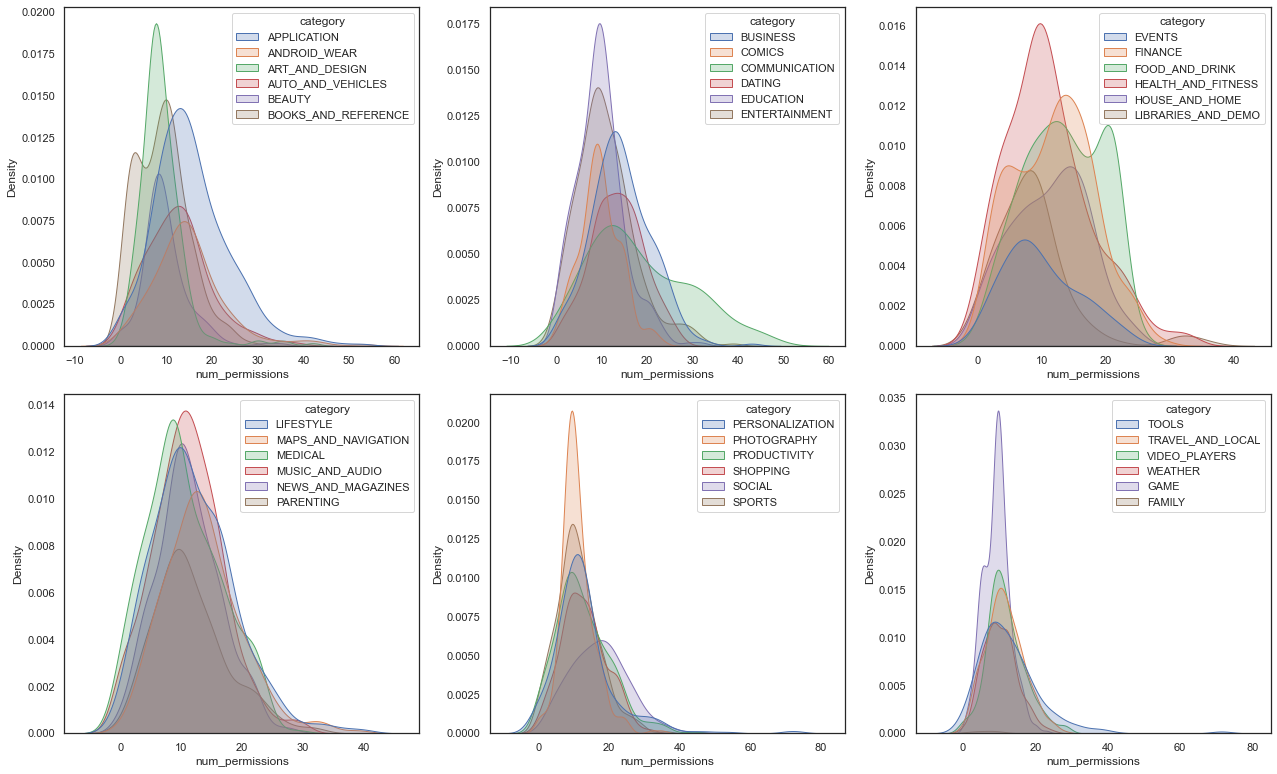

In [22]:
first_cats = ['APPLICATION', 'ANDROID_WEAR', 'ART_AND_DESIGN','AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE']
second_cats = ['BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT']
third_cats = ['EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO']
fourth_cats = ['LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'MUSIC_AND_AUDIO','NEWS_AND_MAGAZINES', 'PARENTING']
fifth_cats = ['PERSONALIZATION','PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS']
sixth_cats = ['TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER', 'GAME', 'FAMILY']

first_subdf = df[df['category'].isin(first_cats)]
second_subdf = df[df['category'].isin(second_cats)]
third_subdf = df[df['category'].isin(third_cats)]
fourth_subdf = df[df['category'].isin(fourth_cats)]
fifth_subdf = df[df['category'].isin(fifth_cats)]
sixth_subdf = df[df['category'].isin(sixth_cats)]

fig, axs = plt.subplots(nrows=2, ncols=3)
fig.tight_layout()
fig.subplots_adjust(wspace=.2)
fig.set_figheight(11)
fig.set_figwidth(18)

plot = sns.kdeplot(data=first_subdf, x="num_permissions", hue="category", fill="true", ax=axs[0][0])
plot = sns.kdeplot(data=second_subdf, x="num_permissions", hue="category", fill="true", ax=axs[0][1])
plot = sns.kdeplot(data=third_subdf, x="num_permissions", hue="category", fill="true", ax=axs[0][2])
plot = sns.kdeplot(data=fourth_subdf, x="num_permissions", hue="category", fill="true", ax=axs[1][0])
plot = sns.kdeplot(data=fifth_subdf, x="num_permissions", hue="category", fill="true", ax=axs[1][1])
plot = sns.kdeplot(data=sixth_subdf, x="num_permissions", hue="category", fill="true", ax=axs[1][2])

plt.savefig('ked_of_permissions.png', bbox_inches = "tight")